classes = [
    "airplane",
    "automobile",
    "bird",
    "cat",
    "deer",
    "dog",
    "frog",
    "horse",
    "ship",
    "truck",
]									


Loaded dataset with 50000 images.


Visualizing a batch of 16 images:


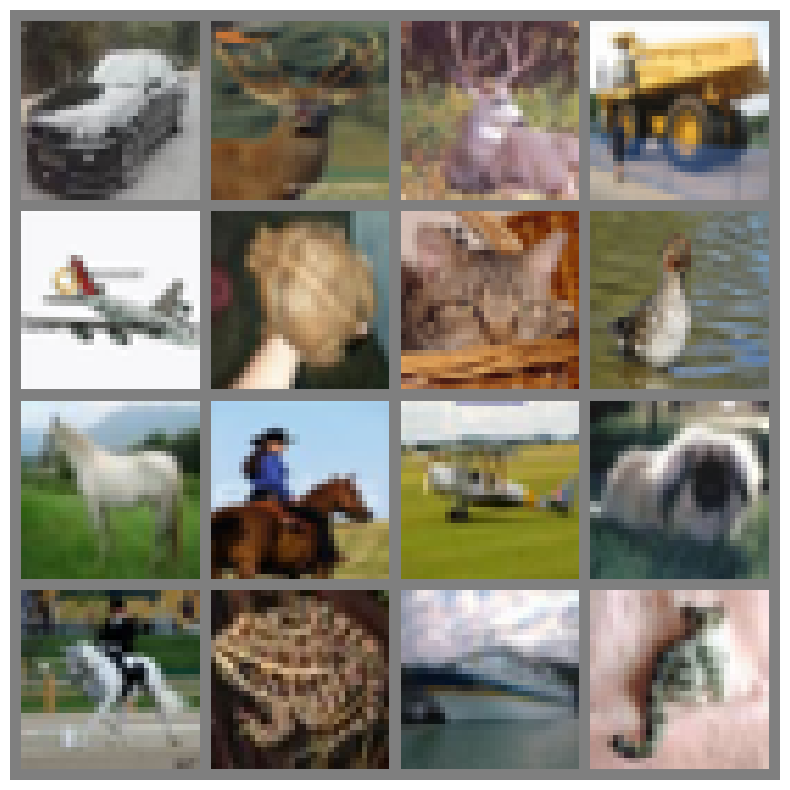

car   deer  deer  truck plane frog  cat   bird  horse horse plane dog   horse frog  ship  cat  


In [3]:
import torch
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import numpy as np

# Function to show an image
def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.figure(figsize=(10,10))
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.axis('off')
    plt.show()

# Load dataset
# Using the same transform as in cifar_reinforce.py for consistency
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5)) # Map [0, 1] to [-1, 1]
])

try:
    # Attempt to load from local ./data directory
    trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                            download=False, transform=transform)
    trainloader = torch.utils.data.DataLoader(trainset, batch_size=16,
                                              shuffle=True, num_workers=2)
    print(f"Loaded dataset with {len(trainset)} images.")
    
    # Get some random training images
    dataiter = iter(trainloader)
    images, labels = next(dataiter)
    
    # Show images
    print("Visualizing a batch of 16 images:")
    imshow(torchvision.utils.make_grid(images, nrow=4))
    
    # Print labels
    classes = ('plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck')
    print(' '.join(f'{classes[labels[j]]:5s}' for j in range(16)))

except RuntimeError as e:
    print(f"Error loading dataset: {e}")
    print("Make sure the dataset is downloaded in ./data")
